In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('data\capstone1_clean.csv')

In [3]:
df1.head()

,City,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),...,Youth Claimant Count Aug 2016 (%),Youth Claimant Count Sep 2016 (%),Youth Claimant Count Oct 2016 (%),Youth Claimant Count Nov 2016 (%),Youth Claimant Count Dec 2016 (%),Youth Claimant Count Jan 2017 (%),Youth Claimant Count Feb 2017 (%),Youth Claimant Count Mar 2017 (%),Youth Claimant Count Apr 2017 (%),Youth Claimant Count May 2017 (%)
0,Aberdeen,588.758170,594.615385,612.781955,598.288509,624.704492,632.870370,629.451288,608.788853,574.7,...,1.87,1.80,1.72,1.69,1.56,1.57,1.77,1.92,1.87,1.87
1,Aldershot,710.333677,675.395560,708.987987,711.109602,708.780032,734.156977,633.790239,659.812059,600.9,...,0.90,1.00,0.98,0.87,0.87,0.81,0.92,0.90,0.92,0.87
2,Barnsley,484.967320,483.333333,473.809524,485.330073,483.687943,487.384259,473.796193,453.697749,426.2,...,3.31,3.39,3.25,3.09,2.89,2.91,3.15,3.17,3.21,3.13
3,Basildon,601.960784,600.128205,585.463659,590.709046,590.661939,570.601852,523.740202,538.370847,474.3,...,2.72,2.67,2.75,2.62,2.64,2.62,2.67,2.75,2.83,2.62
4,Belfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.00,4.04,3.88,3.75,3.44,3.51,3.65,3.64,3.48,3.31


In [10]:
df1.shape

(63, 400)

In [21]:
# drop Belfast row as price data missing
df2 = df1.drop(4, axis=0)
df2 = df2.set_index('City')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Aberdeen to York
Columns: 399 entries, Average Weekly Workplace Earnings 2004  (£) to Youth Claimant Count May 2017  (%)
dtypes: float64(399)
memory usage: 193.8+ KB


In [24]:
houseprices = df2[df2.columns[200:214]]
houseprices.head()

,Mean house price 2003 (£),Mean house price 2004 (£),Mean house price 2005 (£),Mean house price 2006 (£),Mean house price 2007 (£),Mean house price 2008 (£),Mean house price 2009 (£),Mean house price 2010 (£),Mean house price 2011 (£),Mean house price 2012 (£),Mean house price 2013 (£),Mean house price 2014 (£),Mean house price 2015 (£),Mean house price 2016 (£)
City,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.6896,113275.7769,132862.0914,172278.6259,173131.7494,169156.8676,181312.5055,185500.8876,188111.0411,198746.7409,213683.6765,220795.7395,202731.816592
Aldershot,218258.28750,228235.4535,231289.8085,241057.7736,271637.5992,260492.1135,247263.2810,273165.7983,272992.9683,277760.7478,285403.5038,302733.5712,328570.4755,360379.764064
Barnsley,79156.91686,102751.8894,112839.8151,120454.1528,129507.3882,127870.7255,118220.6498,121102.2502,117001.2571,118651.9165,117620.4456,126870.8695,123452.0000,123857.227670
Basildon,162282.35250,178237.5256,188064.3866,197392.2405,212732.7405,211944.0278,206462.8052,225114.9079,219052.7751,220320.3236,226471.5331,243726.3460,261856.0000,301386.174922
Birkenhead,104344.84880,132319.0280,141993.4710,154980.0550,160940.4484,161405.1566,158619.3503,162143.8566,163304.3752,159933.1423,160376.9457,167115.7523,166295.0000,169991.128225


In [25]:
houseprices.columns = houseprices.columns.str.extract('([0-9]+)')
houseprices.head()

C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.6896,113275.7769,132862.0914,172278.6259,173131.7494,169156.8676,181312.5055,185500.8876,188111.0411,198746.7409,213683.6765,220795.7395,202731.816592
Aldershot,218258.28750,228235.4535,231289.8085,241057.7736,271637.5992,260492.1135,247263.2810,273165.7983,272992.9683,277760.7478,285403.5038,302733.5712,328570.4755,360379.764064
Barnsley,79156.91686,102751.8894,112839.8151,120454.1528,129507.3882,127870.7255,118220.6498,121102.2502,117001.2571,118651.9165,117620.4456,126870.8695,123452.0000,123857.227670
Basildon,162282.35250,178237.5256,188064.3866,197392.2405,212732.7405,211944.0278,206462.8052,225114.9079,219052.7751,220320.3236,226471.5331,243726.3460,261856.0000,301386.174922
Birkenhead,104344.84880,132319.0280,141993.4710,154980.0550,160940.4484,161405.1566,158619.3503,162143.8566,163304.3752,159933.1423,160376.9457,167115.7523,166295.0000,169991.128225


In [27]:
houseprices['Ratio 2016 to 2003'] = houseprices['2016'] / houseprices['2003']  
houseprices['Ratio 2015 to 2003'] = houseprices['2015'] / houseprices['2003']  
houseprices

C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Ratio 2016 to 2003,Ratio 2015 to 2003
City,,,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.68960,113275.77690,132862.09140,172278.6259,173131.74940,169156.8676,181312.50550,185500.88760,188111.04110,198746.74090,213683.6765,220795.73950,202731.816592,2.238862,2.438350
Aldershot,218258.28750,228235.45350,231289.80850,241057.77360,271637.5992,260492.11350,247263.2810,273165.79830,272992.96830,277760.74780,285403.50380,302733.5712,328570.47550,360379.764064,1.651162,1.505420
Barnsley,79156.91686,102751.88940,112839.81510,120454.15280,129507.3882,127870.72550,118220.6498,121102.25020,117001.25710,118651.91650,117620.44560,126870.8695,123452.00000,123857.227670,1.564705,1.559586
Basildon,162282.35250,178237.52560,188064.38660,197392.24050,212732.7405,211944.02780,206462.8052,225114.90790,219052.77510,220320.32360,226471.53310,243726.3460,261856.00000,301386.174922,1.857172,1.613583
Birkenhead,104344.84880,132319.02800,141993.47100,154980.05500,160940.4484,161405.15660,158619.3503,162143.85660,163304.37520,159933.14230,160376.94570,167115.7523,166295.00000,169991.128225,1.629128,1.593706
Birmingham,122634.78750,140370.05420,146171.13290,155377.48360,161429.4559,155656.50260,151345.8073,160349.47630,154125.25590,155584.23610,161610.60400,169422.5889,174029.00000,177602.563936,1.448223,1.419083
Blackburn,67973.53108,84997.31396,96858.13686,107958.70030,118638.9298,115128.60240,113340.7204,113730.95640,111355.03250,114135.29730,112291.54590,118449.8859,118872.43090,118717.232714,1.746521,1.748805
Blackpool,97946.29302,124487.20400,135196.72140,147323.39760,153804.3572,152599.37410,146205.1327,151108.45570,140848.63360,137693.57150,140765.66680,148028.5202,147795.10440,146394.338891,1.494639,1.508940
Bournemouth,197133.26340,218477.67650,224776.14970,239136.94370,259467.2610,255697.81650,238888.2591,259090.69280,257480.37740,259834.12870,261736.96020,279850.7279,296454.79480,309274.980637,1.568862,1.503829


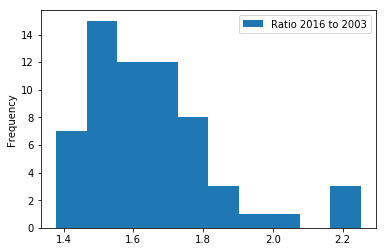

In [45]:
houseprices.plot(kind = 'hist', y='Ratio 2016 to 2003')
plt.show()

In [64]:
df3 = houseprices.iloc[:,0:14]
mean_by_city, std_by_city = df3.mean(axis=1), df3.std(axis=1)



In [60]:
mean_by_city.sort_values(ascending=False)

City
London           390284.518783
Oxford           343934.878338
Cambridge        323043.766516
Reading          275459.239127
Aldershot        271374.367555
Brighton         264575.632229
Bournemouth      254092.859453
Basildon         218217.438523
Southend         214879.397999
Worthing         214813.361396
Slough           210761.519001
Crawley          210432.537881
Bristol          207354.086983
Exeter           206912.440112
Edinburgh        205656.867118
Milton Keynes    203029.905996
York             201972.862847
Southampton      194501.207454
Portsmouth       192346.834781
Norwich          181737.473378
Cardiff          179981.663990
Warrington       175875.266493
Swindon          170059.372675
Chatham          169879.234176
Aberdeen         167349.891726
Luton            164813.202013
Leeds            163944.405114
Northampton      160060.121356
Gloucester       156391.882216
Birmingham       156122.067795
                     ...      
Peterborough     154354.317985
Ips

In [62]:
std_by_city.sort_values(ascending=False)

City
London           97554.392688
Cambridge        83022.528076
Oxford           74754.345668
Brighton         51652.810901
Reading          44346.430225
Aberdeen         41789.810805
Aldershot        39543.720189
Slough           35340.487298
Basildon         34940.084864
Crawley          32708.982325
Southend         31892.291034
Bristol          30696.078431
Milton Keynes    30693.815114
Worthing         30619.583012
Bournemouth      29728.957126
Exeter           27116.506660
Edinburgh        26315.192246
York             25879.464044
Luton            23643.649476
Coventry         23409.118704
Norwich          22088.319552
Chatham          22023.700888
Portsmouth       21536.575436
Dundee           19814.859988
Southampton      19142.812783
Manchester       18691.169641
Plymouth         18096.559654
Bradford         17940.025267
Northampton      17559.933206
Birkenhead       17559.840290
                     ...     
Ipswich          16950.230061
Huddersfield     16518.400864
Peter

In [63]:
norm_std_by_city = std_by_city / mean_by_city
norm_std_by_city.sort_values(ascending=False)

City
Cambridge        0.257001
London           0.249957
Aberdeen         0.249715
Oxford           0.217350
Brighton         0.195229
Burnley          0.176002
Dundee           0.171616
Slough           0.167680
Coventry         0.162301
Hull             0.161093
Reading          0.160991
Basildon         0.160116
Crawley          0.155437
Milton Keynes    0.151179
Southend         0.148419
Bristol          0.148037
Aldershot        0.145716
Luton            0.143457
Worthing         0.142540
Blackburn        0.138022
Bradford         0.131553
Exeter           0.131053
Chatham          0.129643
York             0.128133
Edinburgh        0.127957
Manchester       0.124583
Stoke            0.123471
Middlesbrough    0.122862
Norwich          0.121540
Glasgow          0.120231
                   ...   
Plymouth         0.116229
Huddersfield     0.115149
Birkenhead       0.113616
Portsmouth       0.111967
Ipswich          0.111271
Sheffield        0.111105
Liverpool        0.110388
Barnsle

In [67]:
houseprices['mean_by_city'] = mean_by_city
houseprices['std_to_2016'] = std_by_city
houseprices['norm_std'] = norm_std_by_city
houseprices

C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Ratio 2016 to 2003,Ratio 2015 to 2003,std_to_2016,mean_by_city,norm_std
City,,,,,,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.68960,113275.77690,132862.09140,172278.6259,173131.74940,169156.8676,181312.50550,185500.88760,188111.04110,198746.74090,213683.6765,220795.73950,202731.816592,2.238862,2.438350,41789.810805,167349.891726,0.249715
Aldershot,218258.28750,228235.45350,231289.80850,241057.77360,271637.5992,260492.11350,247263.2810,273165.79830,272992.96830,277760.74780,285403.50380,302733.5712,328570.47550,360379.764064,1.651162,1.505420,39543.720189,271374.367555,0.145716
Barnsley,79156.91686,102751.88940,112839.81510,120454.15280,129507.3882,127870.72550,118220.6498,121102.25020,117001.25710,118651.91650,117620.44560,126870.8695,123452.00000,123857.227670,1.564705,1.559586,12849.237855,117096.964588,0.109732
Basildon,162282.35250,178237.52560,188064.38660,197392.24050,212732.7405,211944.02780,206462.8052,225114.90790,219052.77510,220320.32360,226471.53310,243726.3460,261856.00000,301386.174922,1.857172,1.613583,34940.084864,218217.438523,0.160116
Birkenhead,104344.84880,132319.02800,141993.47100,154980.05500,160940.4484,161405.15660,158619.3503,162143.85660,163304.37520,159933.14230,160376.94570,167115.7523,166295.00000,169991.128225,1.629128,1.593706,17559.840290,154554.468459,0.113616
Birmingham,122634.78750,140370.05420,146171.13290,155377.48360,161429.4559,155656.50260,151345.8073,160349.47630,154125.25590,155584.23610,161610.60400,169422.5889,174029.00000,177602.563936,1.448223,1.419083,13954.713840,156122.067795,0.089383
Blackburn,67973.53108,84997.31396,96858.13686,107958.70030,118638.9298,115128.60240,113340.7204,113730.95640,111355.03250,114135.29730,112291.54590,118449.8859,118872.43090,118717.232714,1.746521,1.748805,14910.826284,108032.022601,0.138022
Blackpool,97946.29302,124487.20400,135196.72140,147323.39760,153804.3572,152599.37410,146205.1327,151108.45570,140848.63360,137693.57150,140765.66680,148028.5202,147795.10440,146394.338891,1.494639,1.508940,14577.058860,140728.340794,0.103583
Bournemouth,197133.26340,218477.67650,224776.14970,239136.94370,259467.2610,255697.81650,238888.2591,259090.69280,257480.37740,259834.12870,261736.96020,279850.7279,296454.79480,309274.980637,1.568862,1.503829,29728.957126,254092.859453,0.117000


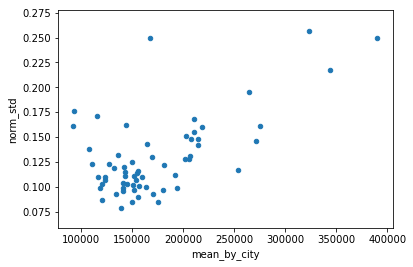

In [66]:
houseprices.plot(kind='scatter', x='mean_by_city', y='norm_std')
plt.show()

Notable examples to examine with time series plots:
- London, Oxford and Cambridge: high meand and high std
- Hull, Burnley: lowest mean and average std
- Aberdeen, Coventry, Glasgow: high std and low to avg mean, drop in 2016

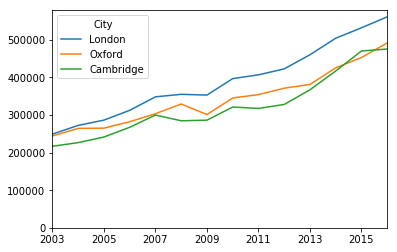

In [91]:
group1 = houseprices.loc[['London', 'Oxford', 'Cambridge'], :'2016'].T
group1.plot()
plt.axis(ymin = 0)
plt.show()

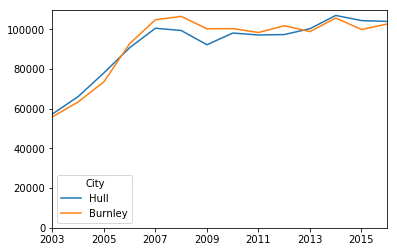

In [90]:
group2 = houseprices.loc[['Hull', 'Burnley'], :'2016'].T
group2.plot()
plt.axis(ymin = 0)
plt.show()

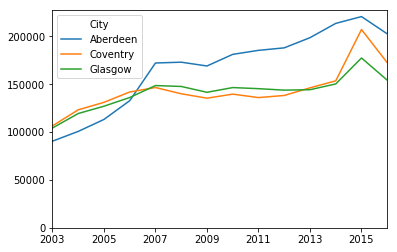

In [89]:
group3 = houseprices.loc[['Aberdeen', 'Coventry', 'Glasgow'], :'2016'].T
group3.plot()
plt.axis(ymin = 0)
plt.show()

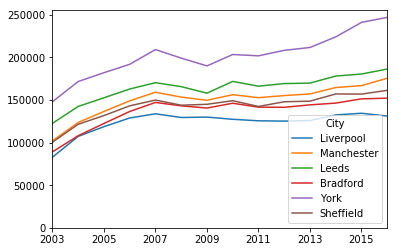

In [94]:
north = houseprices.loc[['Liverpool', 'Manchester', 'Leeds', 'Bradford', 'York', 'Sheffield'], :'2016'].T
north.plot()
plt.axis(ymin = 0)
plt.show()

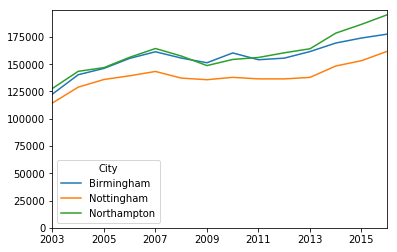

In [96]:
midlands = houseprices.loc[['Birmingham', 'Nottingham', 'Northampton'], :'2016'].T
midlands.plot()
plt.axis(ymin = 0)
plt.show()